In [1]:
import pandas as pd
import numpy as np

In [2]:
d = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/telemonitoring/parkinsons_updrs.data")

####### Notes


Our goal is to predict the "total_UPDRS"

In [3]:
d.head(5)

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [4]:
print (d.total_UPDRS.min())

7.0


In [5]:
print (d.total_UPDRS.max())

54.992


In [6]:
d.shape

(5875, 22)

In [7]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject#       5875 non-null   int64  
 1   age            5875 non-null   int64  
 2   sex            5875 non-null   int64  
 3   test_time      5875 non-null   float64
 4   motor_UPDRS    5875 non-null   float64
 5   total_UPDRS    5875 non-null   float64
 6   Jitter(%)      5875 non-null   float64
 7   Jitter(Abs)    5875 non-null   float64
 8   Jitter:RAP     5875 non-null   float64
 9   Jitter:PPQ5    5875 non-null   float64
 10  Jitter:DDP     5875 non-null   float64
 11  Shimmer        5875 non-null   float64
 12  Shimmer(dB)    5875 non-null   float64
 13  Shimmer:APQ3   5875 non-null   float64
 14  Shimmer:APQ5   5875 non-null   float64
 15  Shimmer:APQ11  5875 non-null   float64
 16  Shimmer:DDA    5875 non-null   float64
 17  NHR            5875 non-null   float64
 18  HNR     

In [8]:
d.describe()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,...,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,21.494128,64.804936,0.317787,92.863722,21.296229,29.018942,0.006154,0.000044,0.002987,0.003277,...,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589
std,12.372279,8.821524,0.465656,53.445602,8.129282,10.700283,0.005624,0.000036,0.003124,0.003732,...,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498
min,1.000000,36.000000,0.000000,-4.262500,5.037700,7.000000,0.000830,0.000002,0.000330,0.000430,...,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,10.000000,58.000000,0.000000,46.847500,15.000000,21.371000,0.003580,0.000022,0.001580,0.001820,...,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340
50%,22.000000,65.000000,0.000000,91.523000,20.871000,27.576000,0.004900,0.000035,0.002250,0.002490,...,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500
75%,33.000000,72.000000,1.000000,138.445000,27.596500,36.399000,0.006800,0.000053,0.003290,0.003460,...,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490
max,42.000000,85.000000,1.000000,215.490000,39.511000,54.992000,0.099990,0.000446,0.057540,0.069560,...,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


The quantile values are close to each other this means the spread of the data is less and so the variance is less. 

In [9]:
d.columns

Index(['subject#', 'age', 'sex', 'test_time', 'motor_UPDRS', 'total_UPDRS',
       'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP',
       'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE'],
      dtype='object')

In [42]:
d = d.rename(columns={'subject#': 'subject', 'Jitter(%)': 'Jitter_percnt', 'Jitter(Abs)': 'Jitter_Abs', 'Jitter:RAP': 'Jitter_RAP', 'Jitter:PPQ5': 'Jitter_PPQ5', 'Jitter:DDP': 'Jitter_DDP', 'Shimmer(dB)': 'Shimmer(dB)', 'Shimmer:APQ3': 'Shimmer_APQ3', 'Shimmer:APQ5': 'Shimmer_APQ5', 'Shimmer:APQ11': 'Shimmer_APQ11', 'Shimmer:DDA': 'Shimmer_DDA','Shimmer(dB)': 'Shimmer_dB' })

In [43]:
d.describe()

,subject,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter_percnt,Jitter_Abs,Jitter_RAP,Jitter_PPQ5,...,Shimmer_dB,Shimmer_APQ3,Shimmer_APQ5,Shimmer_APQ11,Shimmer_DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,...,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,21.494128,64.804936,0.317787,92.863722,21.296229,29.018942,0.006154,0.000044,0.002987,0.003277,...,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589
std,12.372279,8.821524,0.465656,53.445602,8.129282,10.700283,0.005624,0.000036,0.003124,0.003732,...,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498
min,1.000000,36.000000,0.000000,-4.262500,5.037700,7.000000,0.000830,0.000002,0.000330,0.000430,...,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,10.000000,58.000000,0.000000,46.847500,15.000000,21.371000,0.003580,0.000022,0.001580,0.001820,...,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340
50%,22.000000,65.000000,0.000000,91.523000,20.871000,27.576000,0.004900,0.000035,0.002250,0.002490,...,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500
75%,33.000000,72.000000,1.000000,138.445000,27.596500,36.399000,0.006800,0.000053,0.003290,0.003460,...,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490
max,42.000000,85.000000,1.000000,215.490000,39.511000,54.992000,0.099990,0.000446,0.057540,0.069560,...,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


In [44]:
d.columns

Index(['subject', 'age', 'sex', 'test_time', 'motor_UPDRS', 'total_UPDRS',
       'Jitter_percnt', 'Jitter_Abs', 'Jitter_RAP', 'Jitter_PPQ5',
       'Jitter_DDP', 'Shimmer', 'Shimmer_dB', 'Shimmer_APQ3', 'Shimmer_APQ5',
       'Shimmer_APQ11', 'Shimmer_DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE'],
      dtype='object')

C:\Users\pvandana\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1296x720 with 0 Axes>

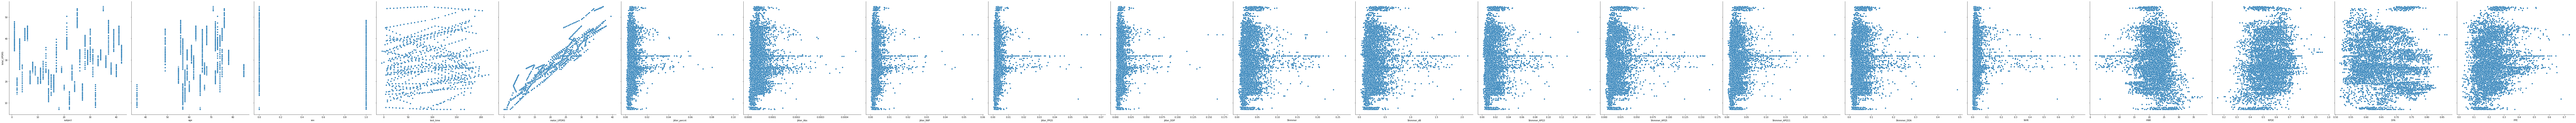

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(18,10))
sns.pairplot(d, x_vars = ['subject', 'age', 'sex', 'test_time', 'motor_UPDRS',
       'Jitter_percnt', 'Jitter_Abs', 'Jitter_RAP', 'Jitter_PPQ5',
       'Jitter_DDP', 'Shimmer', 'Shimmer_dB', 'Shimmer_APQ3', 'Shimmer_APQ5',
       'Shimmer_APQ11', 'Shimmer_DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE'], y_vars = 'total_UPDRS',size = 8, aspect = 1,  kind="scatter")
plt.show

<AxesSubplot:>

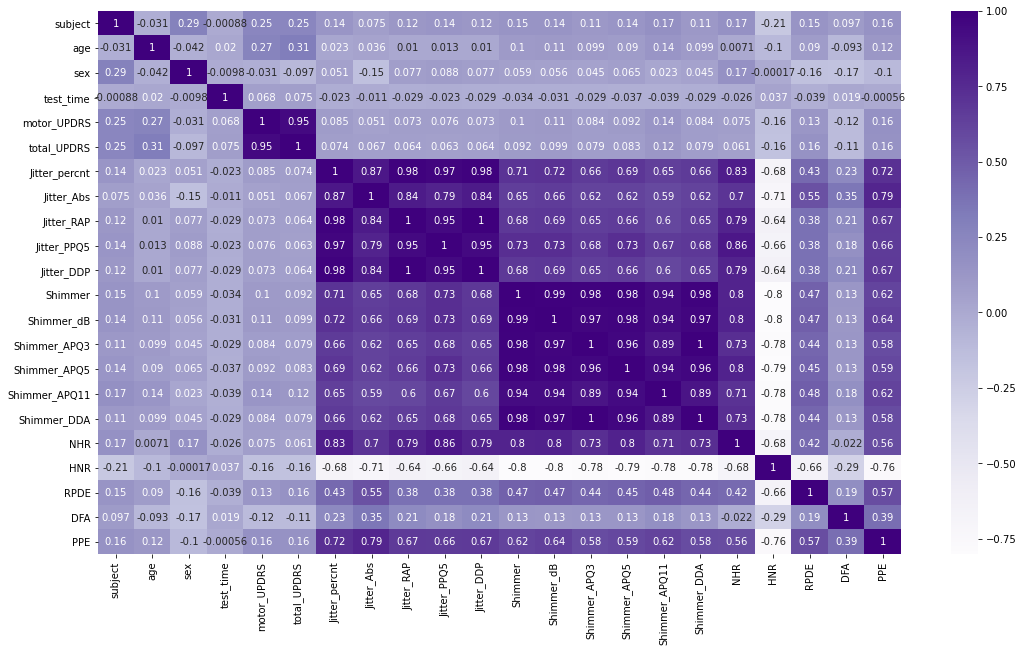

In [46]:

import matplotlib.pyplot as plt
plt.figure(figsize=(18,10))
sns.heatmap(data=d.corr(), cmap = "Purples", annot = True)


In [12]:
#motor_UPDRS is highly correlated with total_UPDRS. HNR and DFA has negative correlation with total_UPDRS

In [13]:
#shimmer variants are correlated with one another and same for jitter.

In [66]:
import statsmodels.formula.api as smf
lr = smf.ols(formula = 'total_UPDRS ~ subject + age+sex + test_time +motor_UPDRS+ Jitter_percnt + Jitter_Abs + Jitter_RAP + Jitter_PPQ5 + \
       Jitter_DDP + Shimmer + Shimmer_dB + Shimmer_APQ3 + Shimmer_APQ5 + Shimmer_APQ11 + Shimmer_DDA + NHR + HNR + RPDE + DFA + PPE', data = d).fit()


#+ `Jitter(Abs)` + `Jitter:RAP` + `Jitter:PPQ5` + `Jitter:DDP` + `Shimmer` + `Shimmer(dB)` + `Shimmer:APQ3` + `Shimmer:APQ11` + `Shimmer:DDA` + NHR+ HNR+ RPDE+ DFA+ PPE
#lr.params

In [67]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_UPDRS   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     2819.
Date:                Sat, 11 Dec 2021   Prob (F-statistic):               0.00
Time:                        22:11:05   Log-Likelihood:                -15187.
No. Observations:                5875   AIC:                         3.042e+04
Df Residuals:                    5853   BIC:                         3.057e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.1701      1.073      2.022      0.043       0.067       4.274
subject           0.0473      0.004     12.173      0.000       0.040       0.055
age               0.0743      0.005     14.507      0.000       0.064       0.084
sex              -1.7588      0.109    -16.064      0.000      -1.973      -1.544
test_time         0.0026      0.001      3.345      0.001       0.001       0.004
motor_UPDRS       1.2066      0.006    206.737      0.000       1.195       1.218
Jitter_percnt  -356.8422     70.515     -5.061      0.000    -495.078    -218.607
Jitter_Abs     1.779e+04   3292.983      5.401      0.000    1.13e+04    2.42e+04
Jitter_RAP     8279.3105   1.55e+04      0.536      0.592    -2.2e+04    3.86e+04
Jitter_PPQ5      82.2633     62.669      1.313      0.189     -40.591     205.118
Jitter_DDP    -2605.4278   5152.634     -0.506      0.613   -1.27e+04    7495.639
Shimmer         -50.8476     21.476     -2.368      0.018     -92.949      -8.747
Shimmer_dB        0.6926      1.602      0.432      0.666      -2.448       3.833
Shimmer_APQ3  -1.367e+04   1.55e+04     -0.881      0.379   -4.41e+04    1.68e+04
Shimmer_APQ5    106.8615     18.326      5.831      0.000      70.936     142.787
Shimmer_APQ11   -42.5066      8.234     -5.163      0.000     -58.648     -26.365
Shimmer_DDA    4554.5527   5174.724      0.880      0.379   -5589.818    1.47e+04
NHR              -4.2625      2.065     -2.064      0.039      -8.311      -0.214
HNR              -0.0881      0.023     -3.844      0.000      -0.133      -0.043
RPDE              2.8600      0.603      4.742      0.000       1.678       4.042
DFA              -3.9438      0.782     -5.045      0.000      -5.476      -2.411
PPE              -3.9585      0.971     -4.076      0.000      -5.862      -2.054
==============================================================================
Omnibus:                      630.563   Durbin-Watson:                   0.109
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              889.129
Skew:                           0.837   Prob(JB):                    8.47e-194
Kurtosis:                       3.909   Cond. No.                     4.98e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.98e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# if the confidence interval includes 0 then the feature is not significant and if the p-value is not less than 0.05 then the feature is not significant

PPE, DFA, RPDE, HNR	, NHR,  Jitter_Abs,Shimmer_APQ11,Shimmer_APQ5,Shimmer,Jitter_percnt	,   test_time, sex, age, subject

In [68]:
lr2 = smf.ols(formula = 'total_UPDRS ~ subject + age+sex + test_time + motor_UPDRS +Jitter_percnt  + Jitter_Abs + \
        Shimmer  + Shimmer_APQ5 + Shimmer_APQ11  + NHR + HNR + RPDE + DFA + PPE', data = d).fit()



In [69]:
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_UPDRS   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     3929.
Date:                Sat, 11 Dec 2021   Prob (F-statistic):               0.00
Time:                        22:14:23   Log-Likelihood:                -15201.
No. Observations:                5875   AIC:                         3.043e+04
Df Residuals:                    5859   BIC:                         3.054e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.8004      1.054      2.656      0.008       0.734       4.867
subject           0.0459      0.004     11.848      0.000       0.038       0.053
age               0.0735      0.005     14.340      0.000       0.063       0.084
sex              -1.6794      0.107    -15.633      0.000      -1.890      -1.469
test_time         0.0025      0.001      3.144      0.002       0.001       0.004
motor_UPDRS       1.2074      0.006    206.682      0.000       1.196       1.219
Jitter_percnt   -28.6733     20.141     -1.424      0.155     -68.158      10.811
Jitter_Abs     1.776e+04   3067.557      5.791      0.000    1.17e+04    2.38e+04
Shimmer         -40.9199     10.080     -4.059      0.000     -60.681     -21.159
Shimmer_APQ5     99.3612     16.287      6.101      0.000      67.433     131.290
Shimmer_APQ11   -46.2738      6.777     -6.828      0.000     -59.559     -32.988
NHR              -5.3054      1.765     -3.006      0.003      -8.765      -1.846
HNR              -0.1029      0.023     -4.571      0.000      -0.147      -0.059
RPDE              2.3914      0.593      4.033      0.000       1.229       3.554
DFA              -3.9686      0.772     -5.139      0.000      -5.482      -2.455
PPE              -5.3924      0.911     -5.917      0.000      -7.179      -3.606
==============================================================================
Omnibus:                      644.108   Durbin-Watson:                   0.103
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              934.669
Skew:                           0.834   Prob(JB):                    1.09e-203
Kurtosis:                       4.019   Cond. No.                     9.27e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
lr3 = smf.ols(formula = 'total_UPDRS ~ subject + age+sex + test_time + motor_UPDRS   + Jitter_Abs + \
         Shimmer  + Shimmer_APQ5 + Shimmer_APQ11  + NHR + HNR + RPDE + DFA + PPE', data = d).fit()


In [71]:
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_UPDRS   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     4209.
Date:                Sat, 11 Dec 2021   Prob (F-statistic):               0.00
Time:                        22:14:48   Log-Likelihood:                -15202.
No. Observations:                5875   AIC:                         3.043e+04
Df Residuals:                    5860   BIC:                         3.054e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.9208      1.051      2.779      0.005       0.861       4.981
subject           0.0460      0.004     11.880      0.000       0.038       0.054
age               0.0736      0.005     14.361      0.000       0.064       0.084
sex              -1.7049      0.106    -16.095      0.000      -1.913      -1.497
test_time         0.0025      0.001      3.195      0.001       0.001       0.004
motor_UPDRS       1.2067      0.006    207.311      0.000       1.195       1.218
Jitter_Abs     1.532e+04   2545.302      6.021      0.000    1.03e+04    2.03e+04
Shimmer         -41.2946     10.078     -4.098      0.000     -61.051     -21.538
Shimmer_APQ5     99.9675     16.283      6.139      0.000      68.047     131.888
Shimmer_APQ11   -46.6072      6.774     -6.881      0.000     -59.886     -33.329
NHR              -6.4741      1.562     -4.144      0.000      -9.537      -3.412
HNR              -0.1066      0.022     -4.767      0.000      -0.150      -0.063
RPDE              2.5166      0.586      4.291      0.000       1.367       3.666
DFA              -4.0765      0.769     -5.304      0.000      -5.583      -2.570
PPE              -5.6168      0.898     -6.257      0.000      -7.377      -3.857
==============================================================================
Omnibus:                      633.967   Durbin-Watson:                   0.103
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              913.619
Skew:                           0.827   Prob(JB):                    4.07e-199
Kurtosis:                       4.000   Cond. No.                     7.69e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.69e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [86]:
lr4 = smf.ols(formula = 'total_UPDRS ~ subject + age+sex + test_time + motor_UPDRS   + Jitter_Abs + \
         Shimmer  + Shimmer_APQ5 + Shimmer_APQ11  + NHR + HNR + RPDE + DFA + PPE +age:sex + sex:test_time + \
          Jitter_Abs:Shimmer + Shimmer:Shimmer_APQ5 + \
         Shimmer_APQ5:Shimmer_APQ11 + Shimmer_APQ11:NHR + NHR:HNR + HNR:DFA + DFA:PPE +\
         PPE:age ', data = d).fit()


In [87]:
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_UPDRS   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     2633.
Date:                Sun, 12 Dec 2021   Prob (F-statistic):               0.00
Time:                        22:27:13   Log-Likelihood:                -15010.
No. Observations:                5875   AIC:                         3.007e+04
Df Residuals:                    5850   BIC:                         3.024e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -4.9060      4.652     -1.055      0.292     -14.026       4.214
subject                        0.0475      0.004     12.485      0.000       0.040       0.055
age                            0.1818      0.015     11.808      0.000       0.152       0.212
sex                            6.2371      0.687      9.077      0.000       4.890       7.584
test_time                      0.0053      0.001      5.766      0.000       0.003       0.007
motor_UPDRS                    1.2213      0.006    214.020      0.000       1.210       1.232
Jitter_Abs                    3.8e+04   4322.286      8.791      0.000    2.95e+04    4.65e+04
Shimmer                       25.5169     14.022      1.820      0.069      -1.971      53.005
Shimmer_APQ5                  96.9298     20.083      4.826      0.000      57.559     136.300
Shimmer_APQ11               -126.6052     13.807     -9.169      0.000    -153.673     -99.538
NHR                          -23.6711      5.421     -4.367      0.000     -34.298     -13.044
HNR                           -0.5002      0.146     -3.424      0.001      -0.787      -0.214
RPDE                           2.7049      0.583      4.643      0.000       1.563       3.847
DFA                           -5.7367      6.513     -0.881      0.378     -18.504       7.031
PPE                           50.0763      7.896      6.342      0.000      34.598      65.555
age:sex                       -0.1062      0.010    -10.470      0.000      -0.126      -0.086
sex:test_time                 -0.0100      0.002     -5.975      0.000      -0.013      -0.007
Jitter_Abs:Shimmer         -1.483e+05   4.72e+04     -3.140      0.002   -2.41e+05   -5.57e+04
Shimmer:Shimmer_APQ5        -691.1478    158.848     -4.351      0.000   -1002.550    -379.746
Shimmer_APQ5:Shimmer_APQ11   838.8690    242.613      3.458      0.001     363.258    1314.480
Shimmer_APQ11:NHR            154.5310     42.635      3.624      0.000      70.950     238.112
NHR:HNR                        0.0516      0.301      0.171      0.864      -0.538       0.641
HNR:DFA                        0.6676      0.218      3.059      0.002       0.240       1.095
DFA:PPE                      -57.4255     10.009     -5.737      0.000     -77.047     -37.804
PPE:age                       -0.2775      0.060     -4.657      0.000      -0.394      -0.161
==============================================================================
Omnibus:                      576.650   Durbin-Watson:                   0.163
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              781.464
Skew:                           0.804   Prob(JB):                    2.03e-170
Kurtosis:                       3.780   Cond. No.                     1.57e+08
============================

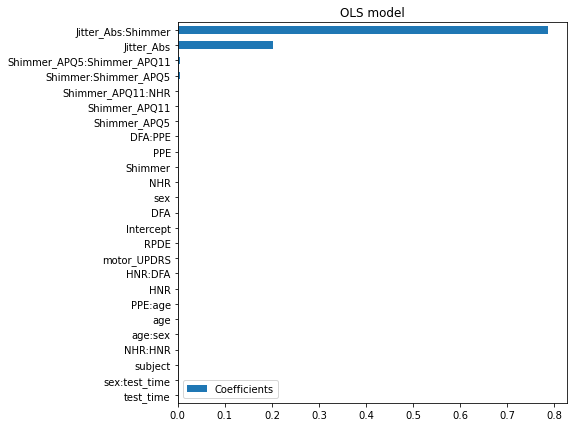

In [88]:
coefs = pd.DataFrame(np.sort(np.abs(lr4.params))/sum(np.abs(lr4.params)), columns=['Coefficients'], index=lr4.params.index[np.argsort(np.abs(lr4.params))])

coefs.plot(kind='barh', figsize=(9, 7))
plt.title('OLS model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

In [89]:
X = d[['subject', 'age', 'sex', 'test_time', 'motor_UPDRS',
        'Jitter_Abs', 'Shimmer',  'Shimmer_APQ5',
       'Shimmer_APQ11',  'NHR', 'HNR', 'RPDE', 'DFA', 'PPE']]
y = d['total_UPDRS']

In [96]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size= 0.15, random_state = 1)

In [136]:
lr = linear_model.LinearRegression() 

res = lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

mean_squared_error = metrics.mean_squared_error(y_test, y_pred)
r_squared = metrics.r2_score(y_test, y_pred)
print(mean_squared_error)
print(r_squared)

91.94981217706754
0.26460361384436926


In [127]:
X = d[['subject', 'age', 'sex', 'test_time', 'motor_UPDRS',
        'Jitter_Abs', 'Shimmer',  'Shimmer_APQ5',
       'Shimmer_APQ11',  'NHR', 'HNR', 'RPDE', 'DFA', 'PPE']]
y = d['total_UPDRS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=1)
lr = linear_model.LinearRegression() #called instantiate a model or make instance of the model
from sklearn.model_selection import cross_val_score
cross_val_score(lr, X, y, cv=10, scoring ='r2').mean()

0.8089361168533366